In [ ]:
!pip install transformers torch torchvision matplotlib PIL

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel, pipeline
from PIL import Image
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import os

# The following lines are used for accessing files from Google Drive in Google Colab.
# They import the necessary library for Google Drive integration and mount your Google Drive as a filesystem.
# Note: If you're running this notebook in a local Jupyter environment, these lines are not needed and should be commented out or removed.
# In a local setup, you can access files directly from your machine's filesystem.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#pipe = pipeline("text-classification")
#pipe("This restaurant is awesome")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998743534088135}]

In [ ]:
# Example usage
input_image_path = 'gdrive/My Drive/Colab Notebooks/NLP/Training data/boston_677231_2.jpg'

def list_image_files(directory):
    """ Lists all image files in the given directory. """
    supported_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.gif']
    image_files = [os.path.join(directory, f) for f in os.listdir(directory)
                   if os.path.isfile(os.path.join(directory, f))
                   and os.path.splitext(f)[1].lower() in supported_extensions]
    return image_files

# Specify the directory containing your images
image_directory = 'gdrive/My Drive/Colab Notebooks/NLP/Training data/'

# Get the list of image file paths
image_dataset_paths = list_image_files(image_directory)


In [ ]:
# Load the pre-trained CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

def get_image_features(image_path, model, processor):
    """ Extracts features from an image using the CLIP model. """
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt")
    outputs = model.get_image_features(**inputs)
    return outputs.detach().numpy()

def find_similar_images(input_image_path, image_paths, model, processor, top_k=5):
    """ Finds and returns the top_k most similar images to the input image. """
    input_features = get_image_features(input_image_path, model, processor)

    # Calculate similarity with other images
    similarities = []
    for path in image_paths:
        features = get_image_features(path, model, processor)
        sim = cosine_similarity(input_features, features)
        similarities.append((path, sim[0][0]))

    # Sort based on similarity
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return top_k similar images
    return similarities[:top_k]




similar_images = find_similar_images(input_image_path, image_dataset_paths, model, processor)
for path, similarity in similar_images:
    print(f"Image: {path}, Similarity: {similarity}")



Image: gdrive/My Drive/Colab Notebooks/NLP/Training data/boston_677231_2.jpg, Similarity: 0.9999999403953552
Image: gdrive/My Drive/Colab Notebooks/NLP/Training data/boston_677231_1.jpg, Similarity: 0.938116192817688
Image: gdrive/My Drive/Colab Notebooks/NLP/Training data/boston_6772311_2.jpg, Similarity: 0.9313091039657593
Image: gdrive/My Drive/Colab Notebooks/NLP/Training data/boston_6772311_1.jpg, Similarity: 0.9212966561317444
Image: gdrive/My Drive/Colab Notebooks/NLP/Training data/boston_43814611_2.jpg, Similarity: 0.9181084632873535


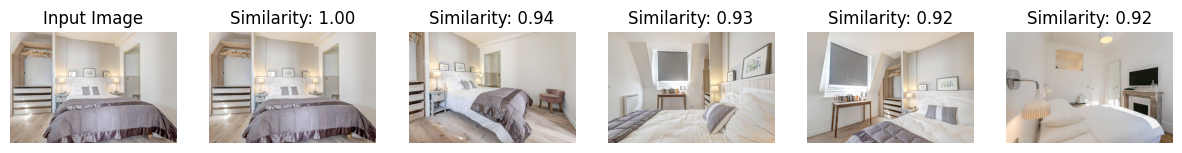

In [ ]:
def display_images(input_image_path, similar_images):
    """ Display the input image and the similar images. """
    plt.figure(figsize=(15, 10))

    # Display the input image
    plt.subplot(1, len(similar_images) + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # Display similar images
    for i, (path, similarity) in enumerate(similar_images, start=2):
        plt.subplot(1, len(similar_images) + 1, i)
        plt.imshow(Image.open(path))
        plt.title(f"Similarity: {similarity:.2f}")
        plt.axis('off')

    plt.show()

# Display the images
display_images(input_image_path, similar_images)
